## Aligning Open-ST metastatic lymph node

In this notebook, we will illustrate how to perform the alignment of 19 serial sections from a [human metastatic lymph node profiled with Open-ST](https://doi.org/10.1016/j.cell.2024.05.055).

### Dataset description
We profiled patient-matched samples from human head and neck squamous cell carcinoma (HNSCC), due to the interesting transcriptional diversity and spatial organization. For the human metastatic lymph node, we applied Open-ST to serial sections spanning 350 μm. We constructed a 3D virtual tissue block with over a million cells and hundreds of millions of transcripts embedded in the H&E stainings. 

### Prerequisites

First of all, you must have a Python environment with [ipykernel](https://ipython.readthedocs.io/en/stable/install/kernel_install.html) for running this notebook, or [Jupyter](https://jupyter.org/).

Alternatively, you can run this notebook in [Google Colab]().

### Installing dependencies

We will install STIM (both the Java-based components, and the Python bindings)

In [ ]:
MAX_SECTION = 19

In [ ]:
if 'google.colab' in str(get_ipython()):
  !apt-get install openjdk-8-jdk maven
  !git clone https://github.com/danilexn/stim.git
  !cd stim && ./install.sh -i ./bin
  !pip install stimwrap
  MAX_SECTION = 3  # in colab, we process only 3 (for illustrative purposes)
else:
  !conda install -c conda-forge stim
  !pip install stimwrap

### Downloading the data

We will download the `AnnData` objects for each of the 19 sections. 

The spatial coordinates in these objects are the centroids of segmented cells (nuclei detected from the H&E stainings, see the paper for more details).

These coordinates are unaligned in these individual h5 objects.

We install a tool to download data from GEO, and setup some utils classes. 

You can do this with any other tool; below is very simple code that gets the job done.

In [ ]:
!pip install GEOparse

In [1]:
from tqdm import tqdm
import os
import urllib.request
import gzip
import shutil

class TqdmUpTo(tqdm):
    def update_to(self, b=1, bsize=1, tsize=None):
        if tsize is not None:
            self.total = tsize
        self.update(b * bsize - self.n)

def download_ftp(url: str, basepath: str = './'):
    basename = url.split('/')[-1]
    cached_file = os.path.join(basepath, basename)
    extract_name = ".".join(cached_file.split(".")[:-1])

    if not os.path.exists(cached_file) and not os.path.exists(extract_name):
        with TqdmUpTo(unit = 'B', unit_scale = True, unit_divisor = 1024, miniters = 1, desc = cached_file) as t:
            urllib.request.urlretrieve("http://" + "/".join(url.split("/")[2:]), cached_file, reporthook = t.update_to)
    
    print(f"Extracting {cached_file} into {extract_name}")
    with gzip.open(cached_file, 'rb') as f_in:
        with open(extract_name, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

    return extract_name

Then, we download the data from GEO into the current folder

In [2]:
import GEOparse

gse = GEOparse.get_GEO(geo="GSE251926", destdir="./", how='brief', silent=True)

In [3]:
sections_processed = 0
for gsm_name, gsm in gse.gsms.items():
    if 'metastatic' in gsm.metadata['title'][0].lower():
        _accession = gsm.metadata['geo_accession'][0]
        _url = gsm.metadata['supplementary_file_1'][0]
        print(f"Downloading {_accession} from {_url}")
        download_ftp(url = _url)
        sections_processed += 1
        if sections_processed >= MAX_SECTION:
            break

./GSM7990100_metastatic_lymph_node_S2.h5ad.gz: 626MB [00:27, 23.8MB/s]                               


Extracting ./GSM7990100_metastatic_lymph_node_S2.h5ad.gz into ./GSM7990100_metastatic_lymph_node_S2.h5ad


./GSM7990101_metastatic_lymph_node_S3.h5ad.gz: 611MB [00:52, 12.3MB/s]                                


Extracting ./GSM7990101_metastatic_lymph_node_S3.h5ad.gz into ./GSM7990101_metastatic_lymph_node_S3.h5ad


./GSM7990102_metastatic_lymph_node_S4.h5ad.gz: 820MB [00:50, 17.0MB/s]                               


Extracting ./GSM7990102_metastatic_lymph_node_S4.h5ad.gz into ./GSM7990102_metastatic_lymph_node_S4.h5ad


./GSM7990103_metastatic_lymph_node_S5.h5ad.gz: 479MB [00:26, 19.0MB/s]                               


Extracting ./GSM7990103_metastatic_lymph_node_S5.h5ad.gz into ./GSM7990103_metastatic_lymph_node_S5.h5ad


./GSM7990104_metastatic_lymph_node_S6.h5ad.gz: 560MB [00:42, 13.7MB/s]                               


Extracting ./GSM7990104_metastatic_lymph_node_S6.h5ad.gz into ./GSM7990104_metastatic_lymph_node_S6.h5ad


./GSM7990105_metastatic_lymph_node_S7.h5ad.gz: 512MB [00:46, 11.6MB/s]                               


Extracting ./GSM7990105_metastatic_lymph_node_S7.h5ad.gz into ./GSM7990105_metastatic_lymph_node_S7.h5ad


./GSM7990106_metastatic_lymph_node_S9.h5ad.gz: 642MB [00:49, 13.5MB/s]                                


Extracting ./GSM7990106_metastatic_lymph_node_S9.h5ad.gz into ./GSM7990106_metastatic_lymph_node_S9.h5ad


./GSM7990107_metastatic_lymph_node_S11.h5ad.gz: 669MB [00:29, 24.0MB/s]                               


Extracting ./GSM7990107_metastatic_lymph_node_S11.h5ad.gz into ./GSM7990107_metastatic_lymph_node_S11.h5ad


./GSM7990108_metastatic_lymph_node_S17.h5ad.gz: 709MB [00:34, 21.5MB/s]                                


Extracting ./GSM7990108_metastatic_lymph_node_S17.h5ad.gz into ./GSM7990108_metastatic_lymph_node_S17.h5ad


./GSM7990109_metastatic_lymph_node_S18.h5ad.gz: 650MB [00:37, 18.0MB/s]                                


Extracting ./GSM7990109_metastatic_lymph_node_S18.h5ad.gz into ./GSM7990109_metastatic_lymph_node_S18.h5ad


./GSM7990110_metastatic_lymph_node_S19.h5ad.gz: 501MB [00:25, 20.3MB/s]                               


Extracting ./GSM7990110_metastatic_lymph_node_S19.h5ad.gz into ./GSM7990110_metastatic_lymph_node_S19.h5ad


./GSM7990111_metastatic_lymph_node_S23.h5ad.gz: 737MB [00:45, 17.0MB/s]                               


Extracting ./GSM7990111_metastatic_lymph_node_S23.h5ad.gz into ./GSM7990111_metastatic_lymph_node_S23.h5ad


./GSM7990112_metastatic_lymph_node_S24.h5ad.gz: 684MB [00:39, 18.2MB/s]                               


Extracting ./GSM7990112_metastatic_lymph_node_S24.h5ad.gz into ./GSM7990112_metastatic_lymph_node_S24.h5ad


./GSM7990113_metastatic_lymph_node_S25.h5ad.gz: 609MB [00:31, 20.1MB/s]                               


Extracting ./GSM7990113_metastatic_lymph_node_S25.h5ad.gz into ./GSM7990113_metastatic_lymph_node_S25.h5ad


./GSM7990114_metastatic_lymph_node_S26.h5ad.gz: 859MB [00:51, 17.3MB/s]                                


Extracting ./GSM7990114_metastatic_lymph_node_S26.h5ad.gz into ./GSM7990114_metastatic_lymph_node_S26.h5ad


./GSM7990115_metastatic_lymph_node_S28.h5ad.gz: 629MB [00:27, 24.2MB/s]                               


Extracting ./GSM7990115_metastatic_lymph_node_S28.h5ad.gz into ./GSM7990115_metastatic_lymph_node_S28.h5ad


./GSM7990116_metastatic_lymph_node_S33.h5ad.gz: 560MB [00:36, 15.9MB/s]                               


Extracting ./GSM7990116_metastatic_lymph_node_S33.h5ad.gz into ./GSM7990116_metastatic_lymph_node_S33.h5ad


./GSM7990117_metastatic_lymph_node_S34.h5ad.gz: 720MB [01:08, 11.0MB/s]                                


Extracting ./GSM7990117_metastatic_lymph_node_S34.h5ad.gz into ./GSM7990117_metastatic_lymph_node_S34.h5ad


./GSM7990118_metastatic_lymph_node_S36.h5ad.gz: 514MB [00:35, 15.2MB/s]                               


Extracting ./GSM7990118_metastatic_lymph_node_S36.h5ad.gz into ./GSM7990118_metastatic_lymph_node_S36.h5ad


Downloading (and decompressing) the whole dataset (~56GB) takes ~20 minutes with a ~200Mbps internet connection. 

Alternatively, you can download the files outside of this notebook with another tool. Make sure that the file names follow:

`GSM79901XX_metastatic_lymph_node_SYY.h5ad(.gz)`

Where `XX` is a number from 00 to 18, and `YY` a number from 0 to 36 (Z-axis coordinate of the section, known from sectioning)

### Importing `stimwrap`

In general, `STIM` is a console-based tool.

However, when running your analysis in the `Python` ecosystem (like here), you can transparently run `STIM` from `Python` by leveraging the wrapper `stimwrap`.

`stimwrap` provides bindings for all commands, and additional tools for data preprocessing and conversion prior to downstream analysis.

In [4]:
import stimwrap as st

In [5]:
st.set_bin_path("/data/rajewsky/home/dleonpe/projects/stim_benchmark/repos/bin")

'/data/rajewsky/home/dleonpe/projects/stim_benchmark/repos/bin'

### Creating a N5 container from `AnnData` objects

STIM requires that the individual section data is resaved into a single N5 container.

This allows to have a single directory containing all data (spatial expression values), metadata (cell annotations), and the output from STIM registration (landmarks, transformation matrices).

You can find more about the N5 standard here.

In [6]:
import glob

sections = glob.glob("./*.h5ad")
sections_numbers = [int(s.split(".")[-2].split("_")[-1][1:]) for s in sections]
sections_numbers, sections = zip(*sorted(zip(sections_numbers, sections)))

print(*[f"Section ID: {s}; Z-axis: {n}" for s, n in zip(sections, sections_numbers)], sep="\n")

Section ID: ./GSM7990100_metastatic_lymph_node_S2.h5ad; Z-axis: 2
Section ID: ./GSM7990101_metastatic_lymph_node_S3.h5ad; Z-axis: 3
Section ID: ./GSM7990102_metastatic_lymph_node_S4.h5ad; Z-axis: 4
Section ID: ./GSM7990103_metastatic_lymph_node_S5.h5ad; Z-axis: 5
Section ID: ./GSM7990104_metastatic_lymph_node_S6.h5ad; Z-axis: 6
Section ID: ./GSM7990105_metastatic_lymph_node_S7.h5ad; Z-axis: 7
Section ID: ./GSM7990106_metastatic_lymph_node_S9.h5ad; Z-axis: 9
Section ID: ./GSM7990107_metastatic_lymph_node_S11.h5ad; Z-axis: 11
Section ID: ./GSM7990108_metastatic_lymph_node_S17.h5ad; Z-axis: 17
Section ID: ./GSM7990109_metastatic_lymph_node_S18.h5ad; Z-axis: 18
Section ID: ./GSM7990110_metastatic_lymph_node_S19.h5ad; Z-axis: 19
Section ID: ./GSM7990111_metastatic_lymph_node_S23.h5ad; Z-axis: 23
Section ID: ./GSM7990112_metastatic_lymph_node_S24.h5ad; Z-axis: 24
Section ID: ./GSM7990113_metastatic_lymph_node_S25.h5ad; Z-axis: 25
Section ID: ./GSM7990114_metastatic_lymph_node_S26.h5ad; Z-axi

With the code above, we have sorted the files according to their names, which contain the Z-axis offset (equal to section number).

Now, we add the slices into a single N5 container:

In [7]:
container_path = "./openst_metastatic_lymph_node.n5"

st.add_slices(container=container_path, inputs=sections)

[2024-07-10T11:59:07,159] [main] INFO : Log level set to: INFO
[2024-07-10T11:59:07,217] [main] INFO : Container '/data/rajewsky/home/dleonpe/projects/stim_benchmark/repos/stimwrap/notebooks/./openst_metastatic_lymph_node.n5' is new ...
[2024-07-10T11:59:07,392] [main] INFO : Linked dataset './GSM7990100_metastatic_lymph_node_S2.h5ad' to container './openst_metastatic_lymph_node.n5'.
[2024-07-10T11:59:08,102] [main] INFO : Log level set to: INFO
[2024-07-10T11:59:08,160] [main] INFO : Container '/data/rajewsky/home/dleonpe/projects/stim_benchmark/repos/stimwrap/notebooks/./openst_metastatic_lymph_node.n5' exists
[2024-07-10T11:59:08,301] [main] INFO : Linked dataset './GSM7990101_metastatic_lymph_node_S3.h5ad' to container './openst_metastatic_lymph_node.n5'.
[2024-07-10T11:59:08,989] [main] INFO : Log level set to: INFO
[2024-07-10T11:59:09,048] [main] INFO : Container '/data/rajewsky/home/dleonpe/projects/stim_benchmark/repos/stimwrap/notebooks/./openst_metastatic_lymph_node.n5' exis

### Pairwise registration

As indicated in its name, STIM will handle ST data as images. These are multi-channel images where the XY dimensions can be specified by a scaling factor (e.g., 1:1 to map 1 pixel to 1 ST unit), and the channels are genes.

During pairwise registration, STIM will automatically find corresponding points between pairs of sections for a subset of genes, and keep those with _high quality/agreement_ across all genes for a pair of sections. This is required prior to assembling a global alignment model (when more than 2 sections are provided).

A subset of genes is used to avoid registering with all genes (in sequencing-based ST, this can lead to ~30,000 channels). This might be too time-consuming, and also most genes do not have sufficient information to render images with spatial patterns that can be used for feature detection (sparsity problem). By default, STIM detects genes with highest variance as a proxy for genes that might show suitable spatial patterns. Otherwise, the user can specify a set of genes used to render images for pairwise alignment. This is what we will do in this tutorial.

This assumes that you have installed `scanpy`. You can do that by simply running
```bash
pip install scanpy
```

Then, you can use it to detect highly variable genes, following the typical workflow for single-cell/spatial analysis

In [ ]:
# Run the code below if you get issues with __DATA_TYPES__
# container = st.Container(container_path)
# container.cleanup_container()

In [8]:
import scanpy as sc
import h5py

# Compute common genes
common_genes = set([g.decode("utf-8") for g in h5py.File(sections[0], 'r')['var/_index'][:].tolist()])
for s in sections[1:]:
    with h5py.File(s, 'r') as s_data:
        common_genes.intersection(set([g.decode("utf-8") for g in s_data['var/_index'][:].tolist()]))

# Load one of the sections; these data is already normalized
adata = sc.read_h5ad(sections[0])

# Filter and normalize
sc.pp.calculate_qc_metrics(adata, inplace=True)
sc.pp.filter_cells(adata, min_counts=250)
sc.pp.filter_cells(adata, max_counts=10000)
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)

# Subset to genes common across all sections
adata = adata[:, adata.var_names.isin(common_genes)]

# Detect and select top 30 highly variable genes (common across all sections)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=10)
hvg_genes = adata.var_names[adata.var['highly_variable']].tolist()

/home/dleonpe/miniconda3/envs/stim_benchmark/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:664: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["hvg"] = {"flavor": flavor}


In [9]:
hvg_genes

['COL1A1',
 'DEFA3',
 'FDCSP',
 'HBB',
 'IGHA1',
 'IGHG4',
 'IGHGP',
 'IGLC3',
 'PLA2G2A',
 'S100A7']

In [10]:
# we remove `adata` from memory because it is not required anymore
import gc
del adata
gc.collect()

854

Now, we run the pairwise alignment with the `hvg_genes`

In [16]:
st.align_pairs(container=container_path,
               max_epsilon=0,
               genes = hvg_genes,
               range = 2,
               scale = 0.03,
               num_threads = 8,
               overwrite=True)

[2024-07-10T14:11:21,142] [main] INFO : Log level set to: INFO
[2024-07-10T14:11:21,319] [main] WARN : No input datasets specified. Trying to open all datasets in './openst_metastatic_lymph_node.n5' ...
[2024-07-10T14:11:21,320] [main] INFO : Opening 19 datasets


Datasets of type STRING(-1) not yet implemented.
Datasets of type BOOLEAN(1) not yet implemented.
Datasets of type STRING(-1) not yet implemented.
Datasets of type BOOLEAN(1) not yet implemented.
Datasets of type STRING(-1) not yet implemented.
Datasets of type BOOLEAN(1) not yet implemented.
Datasets of type STRING(-1) not yet implemented.
Datasets of type BOOLEAN(1) not yet implemented.
Datasets of type STRING(-1) not yet implemented.
Datasets of type BOOLEAN(1) not yet implemented.
Datasets of type STRING(-1) not yet implemented.
Datasets of type BOOLEAN(1) not yet implemented.
Datasets of type STRING(-1) not yet implemented.
Datasets of type BOOLEAN(1) not yet implemented.
Datasets of type STRING(-1) not yet implemented.
Datasets of type BOOLEAN(1) not yet implemented.
Datasets of type STRING(-1) not yet implemented.
Datasets of type BOOLEAN(1) not yet implemented.
Datasets of type STRING(-1) not yet implemented.
Datasets of type BOOLEAN(1) not yet implemented.
Datasets of type STR

[2024-07-10T14:11:39,145] [main] WARN : Parameter maxEpsilon is unset or negative; using 10 * average distance between sequenced locations = 238.0829939722002
[2024-07-10T14:11:39,145] [main] INFO : Overwriting previous results for: GSM7990100_metastatic_lymph_node_S2.h5ad-GSM7990101_metastatic_lymph_node_S3.h5ad
[2024-07-10T14:11:39,156] [main] INFO : Overwriting previous results for: GSM7990100_metastatic_lymph_node_S2.h5ad-GSM7990102_metastatic_lymph_node_S4.h5ad
[2024-07-10T14:11:39,163] [main] INFO : Overwriting previous results for: GSM7990101_metastatic_lymph_node_S3.h5ad-GSM7990102_metastatic_lymph_node_S4.h5ad
[2024-07-10T14:11:39,171] [main] INFO : Overwriting previous results for: GSM7990101_metastatic_lymph_node_S3.h5ad-GSM7990103_metastatic_lymph_node_S5.h5ad
[2024-07-10T14:11:39,179] [main] INFO : Overwriting previous results for: GSM7990102_metastatic_lymph_node_S4.h5ad-GSM7990103_metastatic_lymph_node_S5.h5ad
[2024-07-10T14:11:39,187] [main] INFO : Overwriting previous 

**Importantly**, if you try to run pairwise alignment more than once, you need to specify the argument `overwrite=True` when calling `st.align_pairs`.

Otherwise, `STIM` assumes that pairwise alignment was performed and will exit.

### Visualization of results

It is good practice to manually assess the results of pairwise alignment before proceeding or using these data for analysis, as the set of parameters used for registration might have not been suitable for the data at hand. Some reasons leading to poor alignment might be:

- Poor selection of the subset of genes used for alignment
- Scale (or render factor) parameter too large or too small
- Poor selection of alignment error (`--maxEpsilon`) parameter
- Data is too noisy and might need some filtering (e.g., with `--ffMedian` or `--ffSingleSpot`)

STIM provides GUI-based tools to interactively assess the result from pairwise alignment:

In [ ]:
st.align_pairs_view(container=container_path,
                    datasets=[s[2:] for s in sections],
                    gene=hvg_genes[0])

Alternatively, you can use an interactive pairwise alignment tool to find suitable parameters, iteratively

In [ ]:
st.align_interactive(container=container_path,
                     section_a=sections[0],
                     section_b=sections[1])

To run the interactive alignment via `st.align_interactive` or `st.explorer`,
make sure you are running this notebook in a computer with a graphical environment, or
that you are doing redirection of the window server (e.g., X11 redirection via `ssh -X ...`).

You can learn more about this [here](https://goteleport.com/blog/x11-forwarding/).

### Global alignment

Once you are satisfied with the results from the pairwise alignment of pairs of sections, you can proceed with the global alignment. 

This last step optimizes a global model taking into account all pairs of keypoints. 

This reduces error propagation across sections, which might lead to very large distortions in the reconstruction.

In [ ]:
st.align_global(container=container_path,
                skip_icp=True)

### Visualization of results

Similarly as before, it is good practice to visualize the results after the global alignment procedure. 

STIM can leverage `BigDataViewer` for 3D visualization of these data:

In [ ]:
st.bdv_view3d(container=container_path,
              genes=hvg_genes)

To run `BigDataViewer`, similarly to above, make sure you are running this notebook in a 
computer with a graphical environment, or that you are doing redirection of the window server
(e.g., X11 redirection via `ssh -X ...`).

### Storing the 3D coordinates in `AnnData`

Prior to analysing these objects with `scanpy` or other tools from the `scverse` ecosystem, you can apply the transformation model 
and store the transformed 3D coordinates as a new layer in the `AnnData` (or `N5`) objects.

In [18]:
# load N5 container with stimwrap
container = st.Container(container_path)

/home/dleonpe/miniconda3/envs/stim_benchmark/lib/python3.11/site-packages/stimwrap/_stimwrap.py:330: FutureWarning: The N5Store is deprecated and will be removed in a Zarr-Python version 3, see https://github.com/zarr-developers/zarr-python/issues/1274 for more information.
  self.container = zarr.N5Store(self.path)


In [19]:
# iterate over datasets and apply the computed transformation
for z_axis, dataset_name in zip(sections_numbers, container.get_dataset_names()):
    with container.get_dataset(dataset_name, mode="r+") as dataset:
        dataset.apply_save_transform(transformation="model_sift",
                                     locations='spatial',
                                     destination='spatial_transform_sift',
                                     z_coord=z_axis)

### Demo: interoperability with `scanpy`

Here, we showcase the interoperability of STIM (via `AnnData`-backed N5) by plotting genes and running some data processing with `scanpy`.

First of all, you can create a single `AnnData` object that can be loaded at once with `scanpy` (all cells in the same file).

In [20]:
import scanpy as sc

In [23]:
import anndata as ad

adata_concatenated = ad.concat([ad.read_h5ad(adata_path) for adata_path in sections], join='inner', index_unique="_")
adata_concatenated.write_h5ad("./metastatic_lymph_node_aligned.h5ad")

##### Note

If you get errors in the cell above because of `__DATA_TYPES__` or because of `column-order`, run the following command:

In [22]:
## run if necessary (comment out line below)
# container.cleanup_container()

#### Plotting gene expression

We transpose the Z-axis coordinates for plotting with scanpy (from a different point of view)

In [24]:
adata_concatenated.obsm['spatial_transform_sift_plotting'] = adata_concatenated.obsm['spatial_transform_sift'][:, [2, 0, 1]]

We use the `pl.embedding` function for faster plotting (also, axes are scaled to the same magnitude). One can alternatively use the `pl.spatial` function

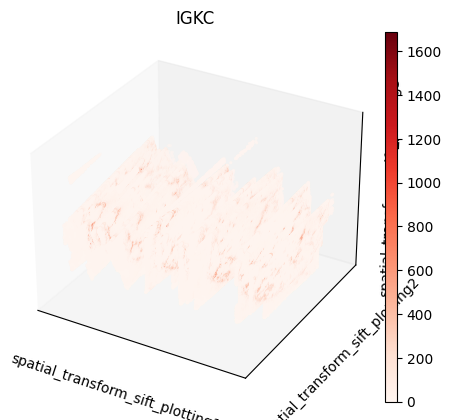

In [25]:
sc.pl.embedding(adata_concatenated, color=['IGKC'], projection='3d', size=1, basis='spatial_transform_sift_plotting', cmap='Reds')

#### Plotting normalized gene expression

In the plot above, raw counts are shown. As different sections had different sequencing depth, the intensities are not fully comparable. 

For improved visualization (and downstream analysis), we can normalize the values across sections. This follows the typical scanpy workflow.

In [26]:
# Filter and normalize
sc.pp.calculate_qc_metrics(adata_concatenated, inplace=True)
sc.pp.filter_cells(adata_concatenated, min_counts=250)
sc.pp.filter_cells(adata_concatenated, max_counts=10000)
sc.pp.normalize_total(adata_concatenated, inplace=True)
sc.pp.log1p(adata_concatenated)

Now we can plot again, which will show depth and log-normalized counts.

In [29]:
sc.pl.embedding(adata_concatenated, color=['IGKC', 'FDCSP', 'COL1A2'], projection='3d', size=1, basis='spatial_transform_sift_plotting', cmap='Reds')

From here we can proceed with downstream analysis, like cell type clustering, differential expression, discovery of spatial features...